In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')
tests = pd.read_csv('tests.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [23]:

pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [24]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [25]:
pokemon.shape

(800, 12)

In [26]:
pokemon['Name'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

In [27]:
pokemon.loc[pokemon['#'] == 63, 'Name'] = 'Primeape'
print(pokemon[pokemon['#'] == 63])

pokemon_clean=pokemon # żeby ci kodu dalej nie zepsuć to takie coś na razie zrobię

     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62  63  Primeape  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  


In [28]:
pokemon_types = pokemon_clean['Type 1'].unique()
print(pokemon_types)
print(len(pokemon_types))

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18


In [29]:
#print sorted pokemon_types
print(pokemon_clean['Type 2'].unique())
print(len(pokemon_clean['Type 2'].unique()))

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
19


In [30]:
all_types = pokemon_clean['Type 1'].tolist() + pokemon_clean['Type 2'].tolist()
all_types = pd.DataFrame(all_types, columns=['Type'])
#all_types = all_types.dropna()
all_types.head()

,Type
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire


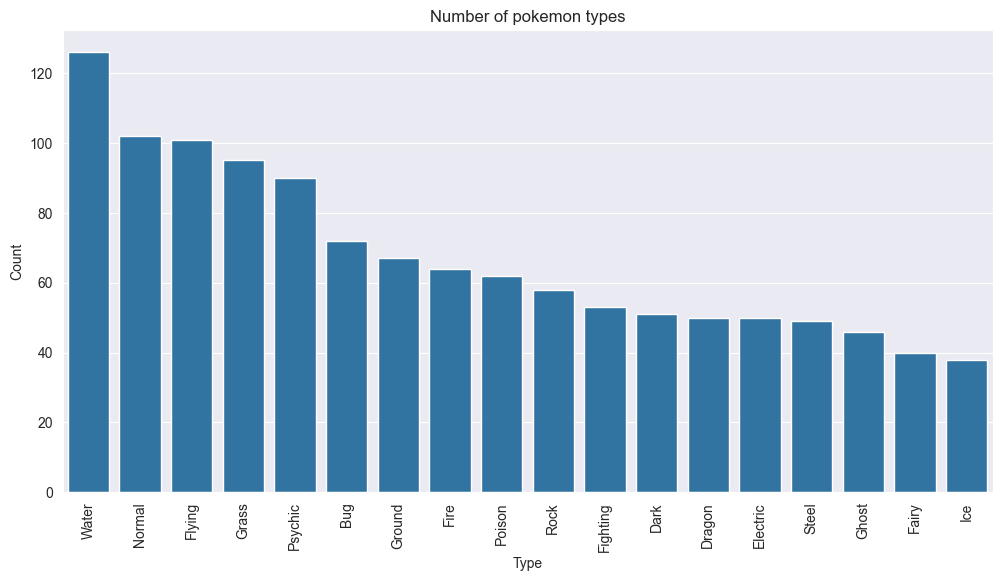

In [31]:
# countplot with pokemon types
plt.figure(figsize=(12, 6))
sns.countplot(data=all_types, x='Type', order=all_types['Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of pokemon types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

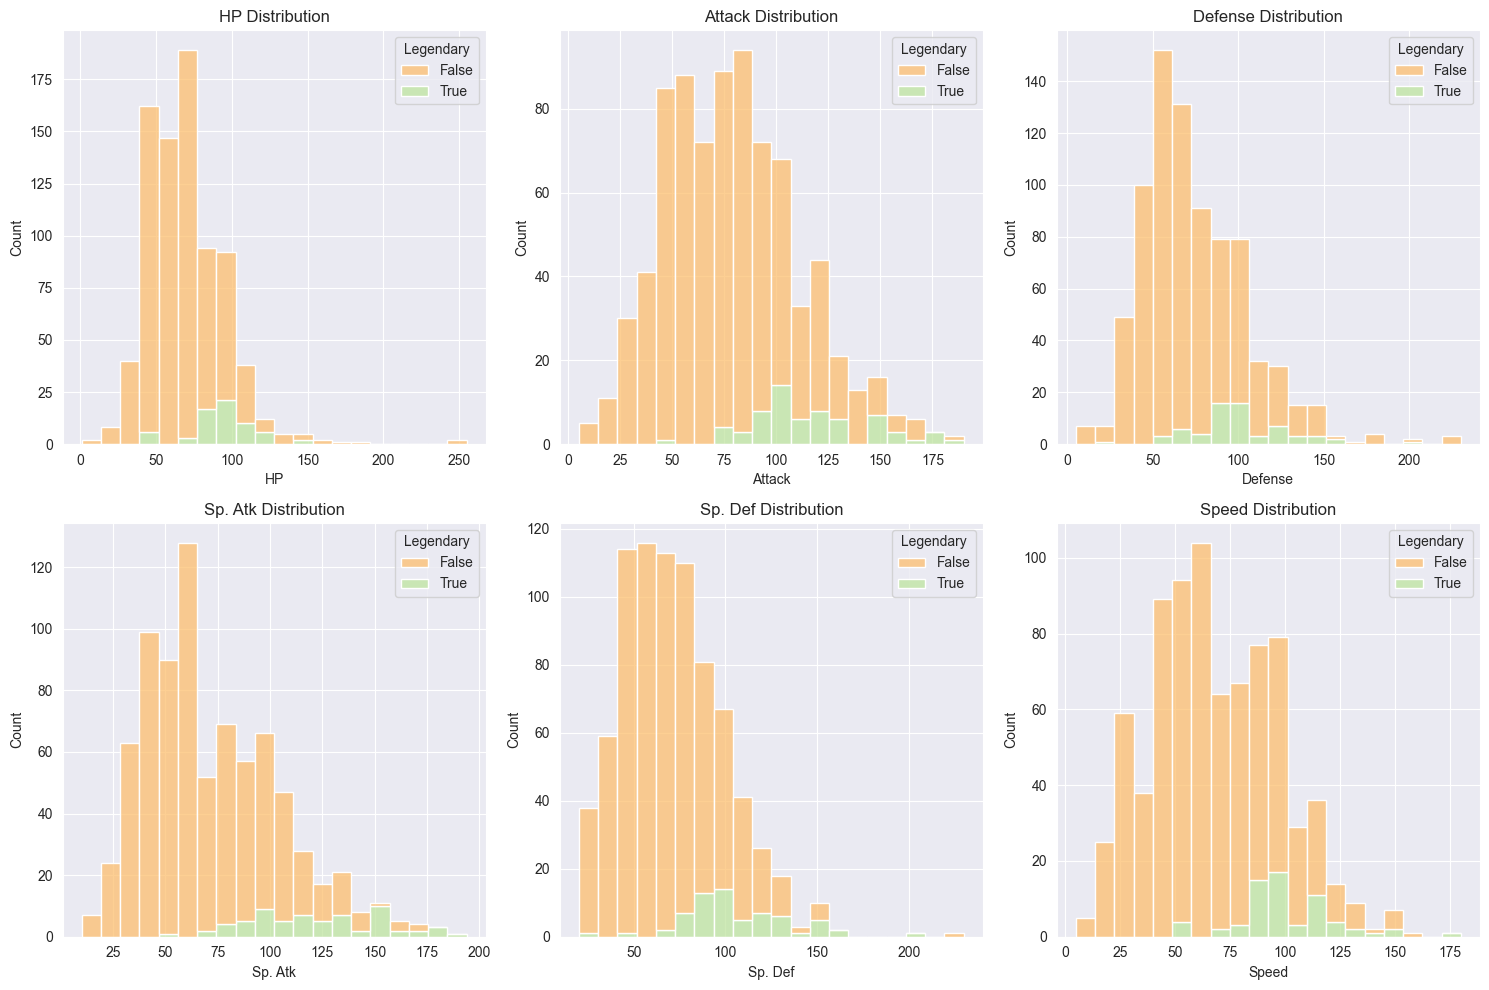

In [32]:
#create 6 subplots distribution for each statistic with different color for legendary and non legendary cumulated plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for i in range(6):
    a = i // 3
    b = i % 3
    sns.histplot(data=pokemon_clean,x=labels[i], ax=axes[a,b], bins=20, hue='Legendary', multiple='stack', palette='Spectral')
    axes[a,b].set_title(f'{labels[i]} Distribution')

plt.tight_layout()
plt.savefig('statistics_distributions.png')
plt.show()


In [33]:
pokemon_clean.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [34]:
hp_ranges = [0,51,101,258]
hp_labels = ['low_hp', 'medium_hp', 'high_hp']
attack_ranges = [0, 62, 124, 191]
attack_labels = ['low_attack', 'medium_attack', 'high_attack']
def_ranges = [0,51, 110, 232]
def_labels = ['low_defense', 'medium_defense', 'high_defense']
sp_atk_ranges = [0,65,130,195]
sp_atk_labels = ['low_sp_atk', 'medium_sp_atk', 'high_sp_atk']
sp_def_ranges = [0,55,110,232]
sp_def_labels = ['low_sp_def', 'medium_sp_def', 'high_sp_def']
speed_ranges = [0, 60, 111, 181]
speed_labels = ['low_speed', 'medium_speed', 'high_speed']

In [35]:
pokemon_with_labels = pokemon_clean.copy()
pokemon_with_labels['HP'] = pd.cut(pokemon_with_labels['HP'], bins=hp_ranges, labels=hp_labels)
pokemon_with_labels['Attack'] = pd.cut(pokemon_with_labels['Attack'], bins=attack_ranges, labels=attack_labels)
pokemon_with_labels['Defense'] = pd.cut(pokemon_with_labels['Defense'], bins=def_ranges, labels=def_labels)
pokemon_with_labels['Sp. Atk'] = pd.cut(pokemon_with_labels['Sp. Atk'], bins=sp_atk_ranges, labels=sp_atk_labels)
pokemon_with_labels['Sp. Def'] = pd.cut(pokemon_with_labels['Sp. Def'], bins=sp_def_ranges, labels=sp_def_labels)
pokemon_with_labels['Speed'] = pd.cut(pokemon_with_labels['Speed'], bins=speed_ranges, labels=speed_labels)
pokemon_with_labels.head()


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False


In [36]:
pokemon_clean = pokemon_clean.rename(columns={'#':'Index'})
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [37]:
# exclude pokemons, which do not appear in combats dataframe
appeared = set(combats['First_pokemon']).union(set(combats['Second_pokemon']))
filtered_pokemon = pokemon_clean[pokemon['#'].isin(appeared)]
pokemon_clean=filtered_pokemon


In [38]:
win_count = pd.DataFrame(combats['Winner'].value_counts())
win_count = win_count.rename(columns={'Winner': 'Index', 'count':'Win Num'})
win_count.head()

,Win Num
Winner,
163,152
438,136
154,136
428,134
314,133


In [39]:
# joining winning number to pokemon_with_labels
pokemon_clean = pd.merge(pokemon_clean, win_count, how='left', left_on='Index', right_on='Winner')
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0


In [40]:
pokemon_clean['Win Num'] = pokemon_clean['Win Num'].fillna(0)
pokemon_clean.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        378
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
dtype: int64

In [41]:
matches = combats['First_pokemon'].tolist() + combats['Second_pokemon'].tolist()
matches = pd.DataFrame(matches, columns=['Index'])
match_count = pd.DataFrame(matches['Index'].value_counts())
match_count = match_count.rename(columns={'Index': 'Index', 'count':'Match Num'})
match_count.head()

,Match Num
Index,
163,164
344,160
667,159
214,158
758,158


In [42]:
pokemon_clean = pd.merge(pokemon_clean, match_count, how='left', left_on='Index', right_on='Index')
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112


In [43]:
pokemon_clean['Match Num'] = pokemon_clean['Match Num'].fillna(0)
pokemon_clean.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        378
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
Match Num       0
dtype: int64

In [44]:
pokemon_clean['Win Ratio'] = pokemon_clean['Win Num'] / pokemon_clean['Match Num']
pokemon_clean['Win Ratio'] = pokemon_clean['Win Ratio'].fillna(0)
pokemon_clean['Win Ratio'] = pokemon_clean['Win Ratio'].replace([np.inf, -np.inf], 0)
pokemon_clean.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        378
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
Match Num       0
Win Ratio       0
dtype: int64

In [45]:
win_ratios_labels = ['low_win_ratio', 'medium_win_ratio', 'high_win_ratio']
win_ratios_ranges = [0, 0.34, 0.67, 1]
pokemon_with_labels['Win Ratio'] = pd.cut(pokemon_clean['Win Ratio'], bins=win_ratios_ranges, labels=win_ratios_labels)
pokemon_with_labels.to_csv('pokemon_with_labels.csv')

In [46]:
pokemon_with_labels.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Ratio
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False,low_win_ratio
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False,medium_win_ratio
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False,high_win_ratio
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False,medium_win_ratio
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False,medium_win_ratio


In [47]:
#pokemon_clean = pd.merge(pokemon_clean, win_count, how='left', left_on='Index', right_on='Winner')
#pokemon_clean = pd.merge(pokemon_clean, match_count, how='left', left_on='Index', right_on='Index')
#pokemon_clean['Win Ratio'] = pokemon_clean['Win Ratio']
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num,Win Ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112,0.491071


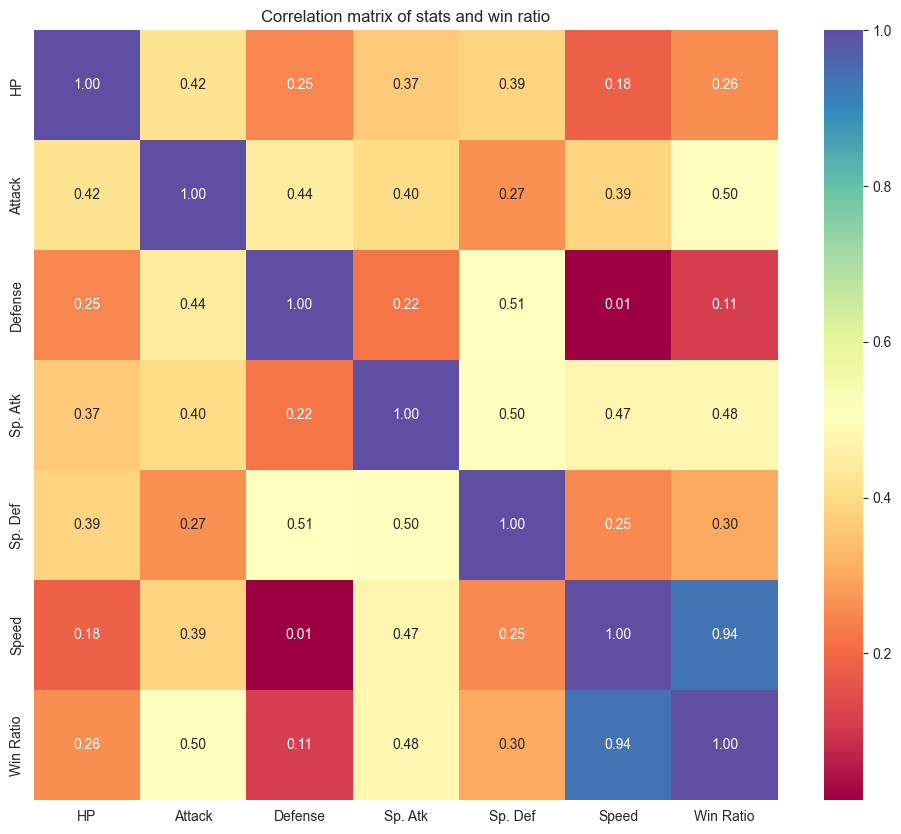

In [48]:
# correlation matrix
columns_to_correlation = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Ratio']
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_clean[columns_to_correlation].corr(), annot=True, fmt='.2f', cmap='Spectral')
plt.title('Correlation matrix of stats and win ratio')
plt.savefig('correlation_matrix_stats.png')
plt.show()


In [49]:
win_ratio_by_type_1 = pokemon_clean.groupby('Type 1')['Win Ratio'].mean().reset_index()
win_ratio_by_type_2 = pokemon_clean.groupby('Type 2')['Win Ratio'].mean().reset_index()
win_ratio_by_type_1['count'] = pokemon_clean.groupby('Type 1')['Type 1'].count().values
win_ratio_by_type_2['count'] = pokemon_clean.groupby('Type 2')['Type 2'].count().values
print(win_ratio_by_type_1, win_ratio_by_type_2)

      Type 1  Win Ratio  count
0        Bug   0.432550     68
1       Dark   0.629726     30
2     Dragon   0.633587     31
3   Electric   0.632861     43
4      Fairy   0.329300     17
5   Fighting   0.475616     26
6       Fire   0.579215     52
7     Flying   0.765061      4
8      Ghost   0.484027     31
9      Grass   0.440364     67
10    Ground   0.541526     31
11       Ice   0.439604     24
12    Normal   0.535578     95
13    Poison   0.433262     28
14   Psychic   0.545747     57
15      Rock   0.404852     44
16     Steel   0.424529     27
17     Water   0.469357    109       Type 2  Win Ratio  count
0        Bug   0.439055      3
1       Dark   0.594685     20
2     Dragon   0.605966     18
3   Electric   0.532644      6
4      Fairy   0.432114     22
5   Fighting   0.676791     26
6       Fire   0.633781     12
7     Flying   0.663559     96
8      Ghost   0.445396     13
9      Grass   0.420361     24
10    Ground   0.376463     35
11       Ice   0.587451     14
12    No

In [50]:
mean_win_ratio_by_type = win_ratio_by_type_1.copy()
mean_win_ratio_by_type['Win Ratio'] = (win_ratio_by_type_1['Win Ratio']* win_ratio_by_type_1['count'] + win_ratio_by_type_2['Win Ratio'] * win_ratio_by_type_2['count']) / (win_ratio_by_type_1['count'] + win_ratio_by_type_2['count'])
mean_win_ratio_by_type['count'] = win_ratio_by_type_1['count'] + win_ratio_by_type_2['count']
mean_win_ratio_by_type

,Type 1,Win Ratio,count
0,Bug,0.432824,71
1,Dark,0.615710,50
2,Dragon,0.623441,49
3,Electric,0.620589,49
4,Fairy,0.387297,39
5,Fighting,0.576203,52
6,Fire,0.589446,64
7,Flying,0.667619,100
8,Ghost,0.472614,44
9,Grass,0.435089,91


C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\3424886740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio', palette='Spectral')


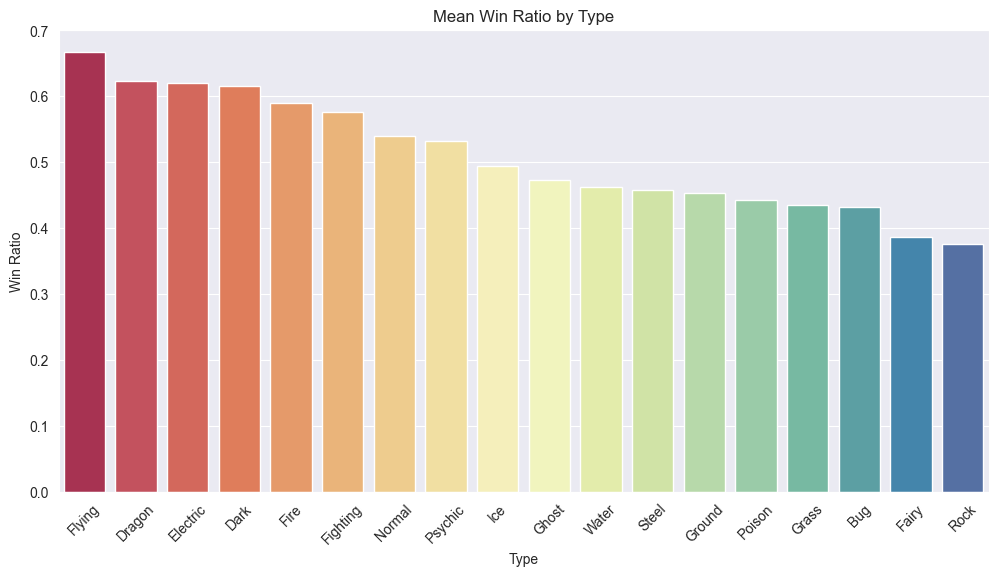

In [51]:
# plotting the mean win ratio by type
mean_win_ratio_by_type = mean_win_ratio_by_type.sort_values('Win Ratio', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio', palette='Spectral')
plt.xticks(rotation=45)
plt.title('Mean Win Ratio by Type')
plt.xlabel('Type')
plt.ylabel('Win Ratio')
plt.savefig('mean_win_ratios.png')
plt.show()

In [52]:
pokemon_clean['Has 2 Types'] = ~pokemon_clean['Type 2'].isnull()
win_ratio_by_types_number = pokemon_clean.groupby('Has 2 Types')['Win Ratio'].mean().reset_index()
win_ratio_by_legendary = pokemon_clean.groupby('Legendary')['Win Ratio'].mean().reset_index()
print(win_ratio_by_types_number)
print(win_ratio_by_legendary)

   Has 2 Types  Win Ratio
0        False   0.465803
1         True   0.533573
   Legendary  Win Ratio
0      False   0.476166
1       True   0.779137


C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\1908834133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_ratio_by_types_number, x='Has 2 Types', y='Win Ratio', ax=axes[0], palette='Spectral')
C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\1908834133.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_ratio_by_legendary, x='Legendary', y='Win Ratio', ax=axes[1], palette='Spectral')


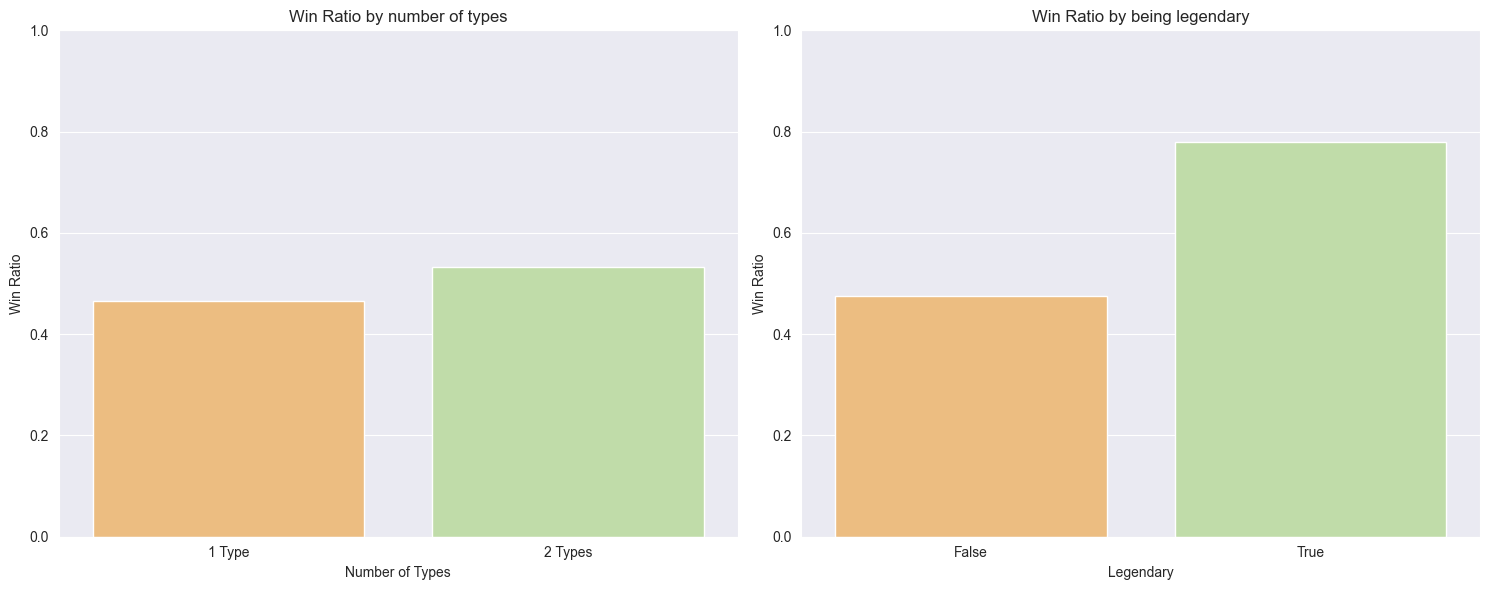

In [53]:
# plot 2 barplot for win ratio by types number and legendary
from matplotlib.ticker import FixedLocator
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=win_ratio_by_types_number, x='Has 2 Types', y='Win Ratio', ax=axes[0], palette='Spectral')
axes[0].set_ylim(0, 1)
axes[0].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[0].set_xticklabels(['1 Type', '2 Types'])
axes[0].set_title('Win Ratio by number of types')
axes[0].set_xlabel('Number of Types')
axes[0].set_ylabel('Win Ratio')
sns.barplot(data=win_ratio_by_legendary, x='Legendary', y='Win Ratio', ax=axes[1], palette='Spectral')
axes[1].set_ylim(0, 1)
axes[1].set_title('Win Ratio by being legendary')
axes[1].set_xlabel('Legendary')
axes[1].set_ylabel('Win Ratio')
plt.tight_layout()
fig.savefig('win_ratios.png')
plt.show()

In [54]:
pokemon_with_labels['Has 2 Types'] = pokemon_clean['Has 2 Types']
pokemon_with_labels.to_csv('pokemon_with_labels.csv')

In [55]:
# Frequency table between has two types and legendary
frequency_table = pd.crosstab(['Has 2 Types'], pokemon_with_labels['Legendary'])
print(frequency_table)

Legendary    False  True 
row_0                    
Has 2 Types    735     65


In [56]:
combats_expanded = combats.copy()
combats_expanded['Has First Won'] = combats_expanded['Winner'] == combats_expanded['First_pokemon']
first_winning_ratio = combats_expanded['Has First Won'].sum() / combats_expanded.shape[0]
print(first_winning_ratio)

0.47202


In [57]:
def pick_loser():
    losers = []
    for i in range(len(combats_expanded)):
        if combats_expanded['Has First Won'][i]:
            losers.append(combats_expanded['Second_pokemon'][i])
        else:
            losers.append(combats_expanded['First_pokemon'][i])
    return losers

In [58]:
combats_expanded['Loser'] = pick_loser()
combats_expanded['Type 1 Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Type 1'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner
0,266,298,298,False,266,Grass
1,702,701,701,False,702,Rock
2,191,668,668,False,191,Psychic
3,237,683,683,False,237,Dragon
4,151,231,151,True,231,Rock


In [59]:
combats_expanded['Type 2 Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Type 2'])
combats_expanded['Type 1 Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Type 1'])
combats_expanded['Type 2 Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Type 2'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser
0,266,298,298,False,266,Grass,Dark,Rock,Ground
1,702,701,701,False,702,Rock,Fighting,Grass,Fighting
2,191,668,668,False,191,Psychic,NaN,Fairy,Flying
3,237,683,683,False,237,Dragon,NaN,Fire,NaN
4,151,231,151,True,231,Rock,Water,Bug,Rock


In [60]:
pokemon_clean['normal_stats'] = pokemon_clean['HP'] + pokemon_clean['Attack'] + pokemon_clean['Defense'] + pokemon_clean['Speed']
pokemon_clean['special_stats'] = pokemon_clean['Sp. Atk'] + pokemon_clean['Sp. Def']
pokemon_clean['total_stats'] = pokemon_clean['normal_stats'] + pokemon_clean['special_stats']
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num,Win Ratio,Has 2 Types,normal_stats,special_stats,total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133,0.278195,True,188,130,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121,0.380165,True,245,160,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132,0.674242,True,325,200,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125,0.560000,True,383,242,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112,0.491071,False,199,110,309


C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\2006820679.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\2006820679.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\2006820679.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\2006820679.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


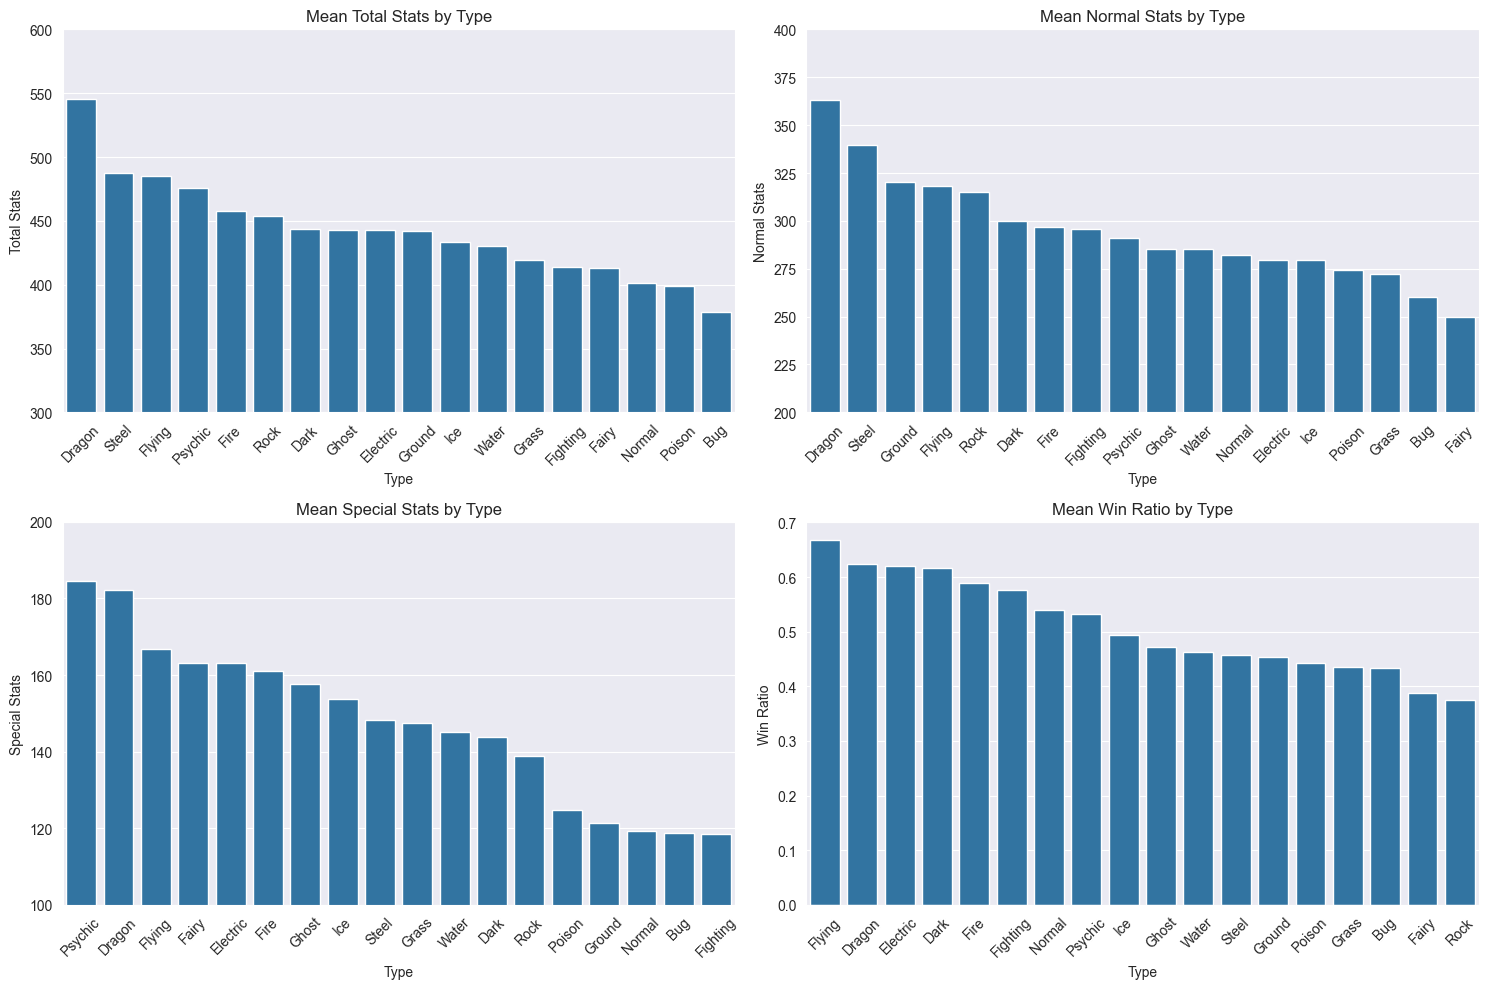

In [61]:
mean_total_stats_by_type = pokemon_clean.groupby('Type 1')['total_stats'].mean().reset_index()
mean_total_stats_by_type = mean_total_stats_by_type.sort_values('total_stats', ascending=False)
mean_normal_stats_by_type = pokemon_clean.groupby('Type 1')['normal_stats'].mean().reset_index()
mean_normal_stats_by_type = mean_normal_stats_by_type.sort_values('normal_stats', ascending=False)
mean_special_stats_by_type = pokemon_clean.groupby('Type 1')['special_stats'].mean().reset_index()
mean_special_stats_by_type = mean_special_stats_by_type.sort_values('special_stats', ascending=False)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=mean_total_stats_by_type, x='Type 1', y='total_stats', ax=axes[0, 0])
axes[0, 0].set_title('Mean Total Stats by Type')
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Total Stats')
axes[0, 0].set_ylim(300, 600)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
sns.barplot(data=mean_normal_stats_by_type, x='Type 1', y='normal_stats', ax=axes[0, 1])
axes[0, 1].set_title('Mean Normal Stats by Type')
axes[0, 1].set_xlabel('Type')
axes[0, 1].set_ylabel('Normal Stats')
axes[0, 1].set_ylim(200, 400)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
sns.barplot(data=mean_special_stats_by_type, x='Type 1', y='special_stats', ax=axes[1, 0])
axes[1, 0].set_title('Mean Special Stats by Type')
axes[1, 0].set_xlabel('Type')
axes[1, 0].set_ylabel('Special Stats')
axes[1, 0].set_ylim(100, 200)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio', ax=axes[1, 1])
axes[1, 1].set_title('Mean Win Ratio by Type')
axes[1, 1].set_xlabel('Type')
axes[1, 1].set_ylabel('Win Ratio')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

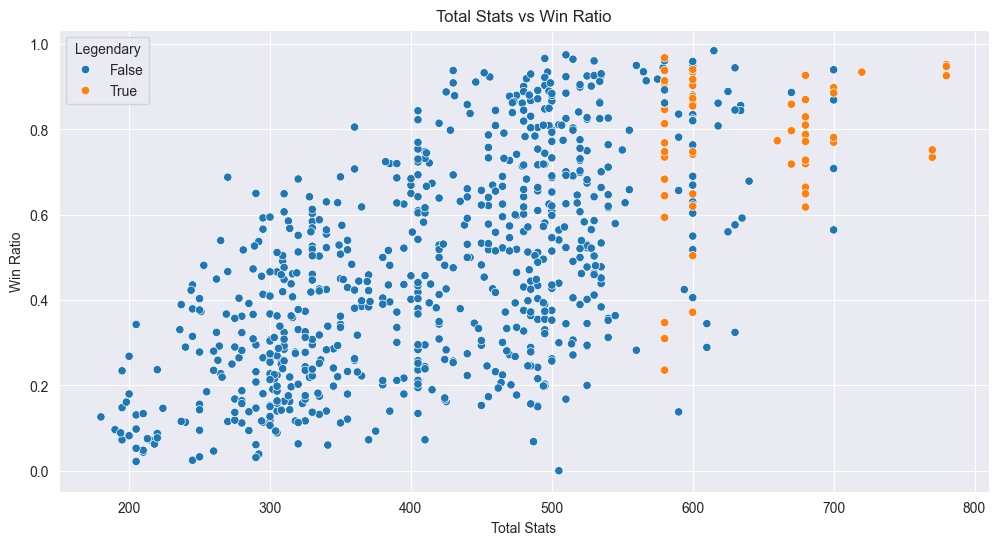

In [62]:
# Scatterplot of total stats vs win ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_clean, x='total_stats', y='Win Ratio', hue='Legendary')
plt.title('Total Stats vs Win Ratio')
plt.xlabel('Total Stats')
plt.ylabel('Win Ratio')
plt.show()

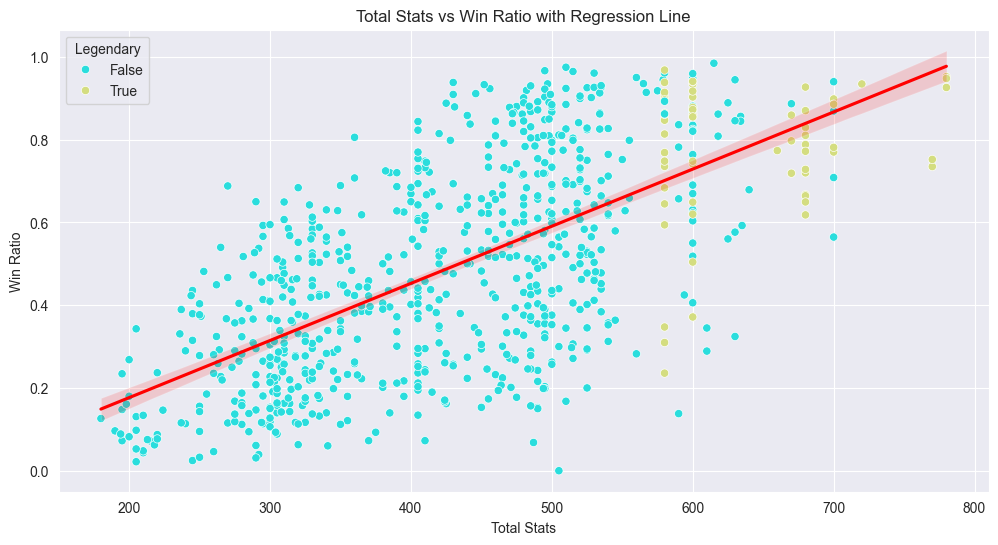

In [63]:
# Adding regression line to the scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_clean, x='total_stats', y='Win Ratio', hue='Legendary', palette='rainbow')
sns.regplot(data=pokemon_clean, x='total_stats', y='Win Ratio', line_kws={'color':'red'}, scatter=False)
plt.title('Total Stats vs Win Ratio with Regression Line')
plt.xlabel('Total Stats')
plt.ylabel('Win Ratio')
plt.savefig('Total Stats vs Win Ratio with Regression Line.png')
plt.show()


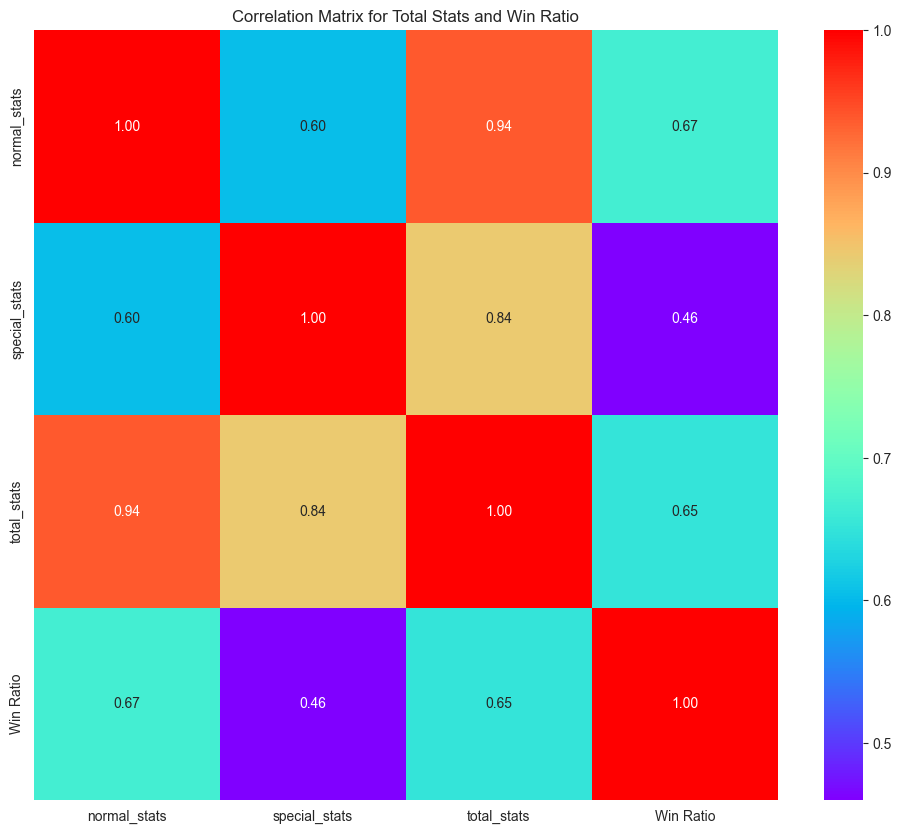

In [64]:
# Correlation matrix for total stats and win ratio
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_clean[['normal_stats', 'special_stats', 'total_stats', 'Win Ratio']].corr(), annot=True, fmt='.2f', cmap='rainbow')
plt.title('Correlation Matrix for Total Stats and Win Ratio')
plt.savefig('Correlation Matrix vs Total Stats and Win Ratio.png')
plt.show()

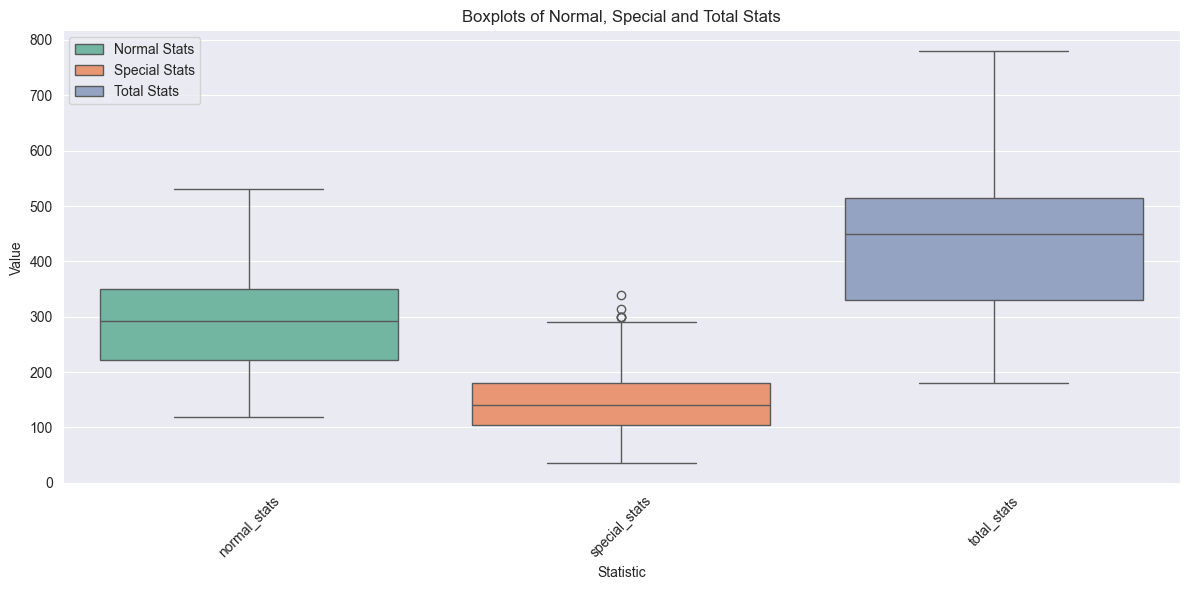

In [65]:
# Box plots for normal, special and total stats
stats_columns = ['normal_stats', 'special_stats', 'total_stats']
plt.figure(figsize=(12, 6))
sns.boxplot(data=pokemon_clean[stats_columns], palette='Set2')
plt.title('Boxplots of Normal, Special and Total Stats')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Normal Stats', 'Special Stats', 'Total Stats'])
plt.tight_layout()
plt.show()

In [101]:
# Creating feature columns for combats
pokemon_clean['Sum of Attack'] = pokemon_clean['Attack'] + pokemon_clean['Sp. Atk']
pokemon_clean['Sum of Defense'] = pokemon_clean['Defense'] + pokemon_clean['Sp. Def']

columns_to_difference = ['total_stats', 'Attack', 'Sp. Atk', 'Speed', 'Defense', 'Sp. Def', 'HP', 'Sum of Attack', 'Sum of Defense']
for column in columns_to_difference:
    combats_expanded[column + '_diff'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')[column]) - combats_expanded['Loser'].map(pokemon_clean.set_index('Index')[column])

combats_expanded.head()


,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser,total_stats_diff,Attack_diff,Sp. Atk_diff,Speed_diff,Defense_diff,HP_diff,Sp. Def_diff,Sum of Attack_diff,Sum of Defense_diff
0,266,298,298,False,266,Grass,Dark,Rock,Ground,40,6,15,19,-10,20,-10,21,-20
1,702,701,701,False,702,Rock,Fighting,Grass,Fighting,0,39,-18,0,18,0,-39,21,-21
2,191,668,668,False,191,Psychic,NaN,Fairy,Flying,80,35,45,0,-10,20,-10,80,-20
3,237,683,683,False,237,Dragon,NaN,Fire,NaN,235,80,-10,28,50,37,50,70,100
4,151,231,151,True,231,Rock,Water,Bug,Rock,-10,50,105,50,-105,50,-160,155,-265


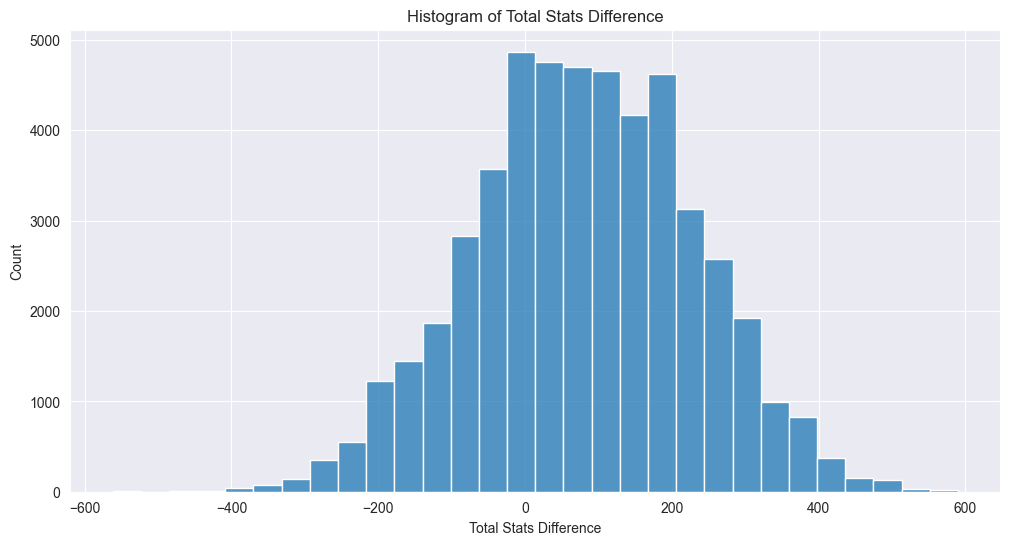

In [99]:
# Histogram of total stats difference
plt.figure(figsize=(12, 6))
sns.histplot(data=combats_expanded, x='total_stats_diff', bins=30)
plt.title('Histogram of Total Stats Difference')
plt.xlabel('Total Stats Difference')
plt.ylabel('Count')
plt.show()

In [102]:
diff_means = []
diff_medians = []

for column in columns_to_difference:
    mean_diff = combats_expanded[column + '_diff'].mean()
    diff_means.append(mean_diff)
    median_diff = combats_expanded[column + '_diff'].median()
    diff_medians.append(median_diff)
    print(f"{column}: mean diff = {mean_diff:.2f}, median diff = {median_diff:.2f}")

total_stats: mean diff = 79.78, median diff = 80.00
Attack: mean diff = 16.67, median diff = 15.00
Sp. Atk: mean diff = 16.07, median diff = 15.00
Speed: mean diff = 27.98, median diff = 25.00
Defense: mean diff = 3.54, median diff = 5.00
Sp. Def: mean diff = 8.62, median diff = 10.00
HP: mean diff = 6.90, median diff = 8.00
Sum of Attack: mean diff = 32.75, median diff = 30.00
Sum of Defense: mean diff = 12.15, median diff = 15.00


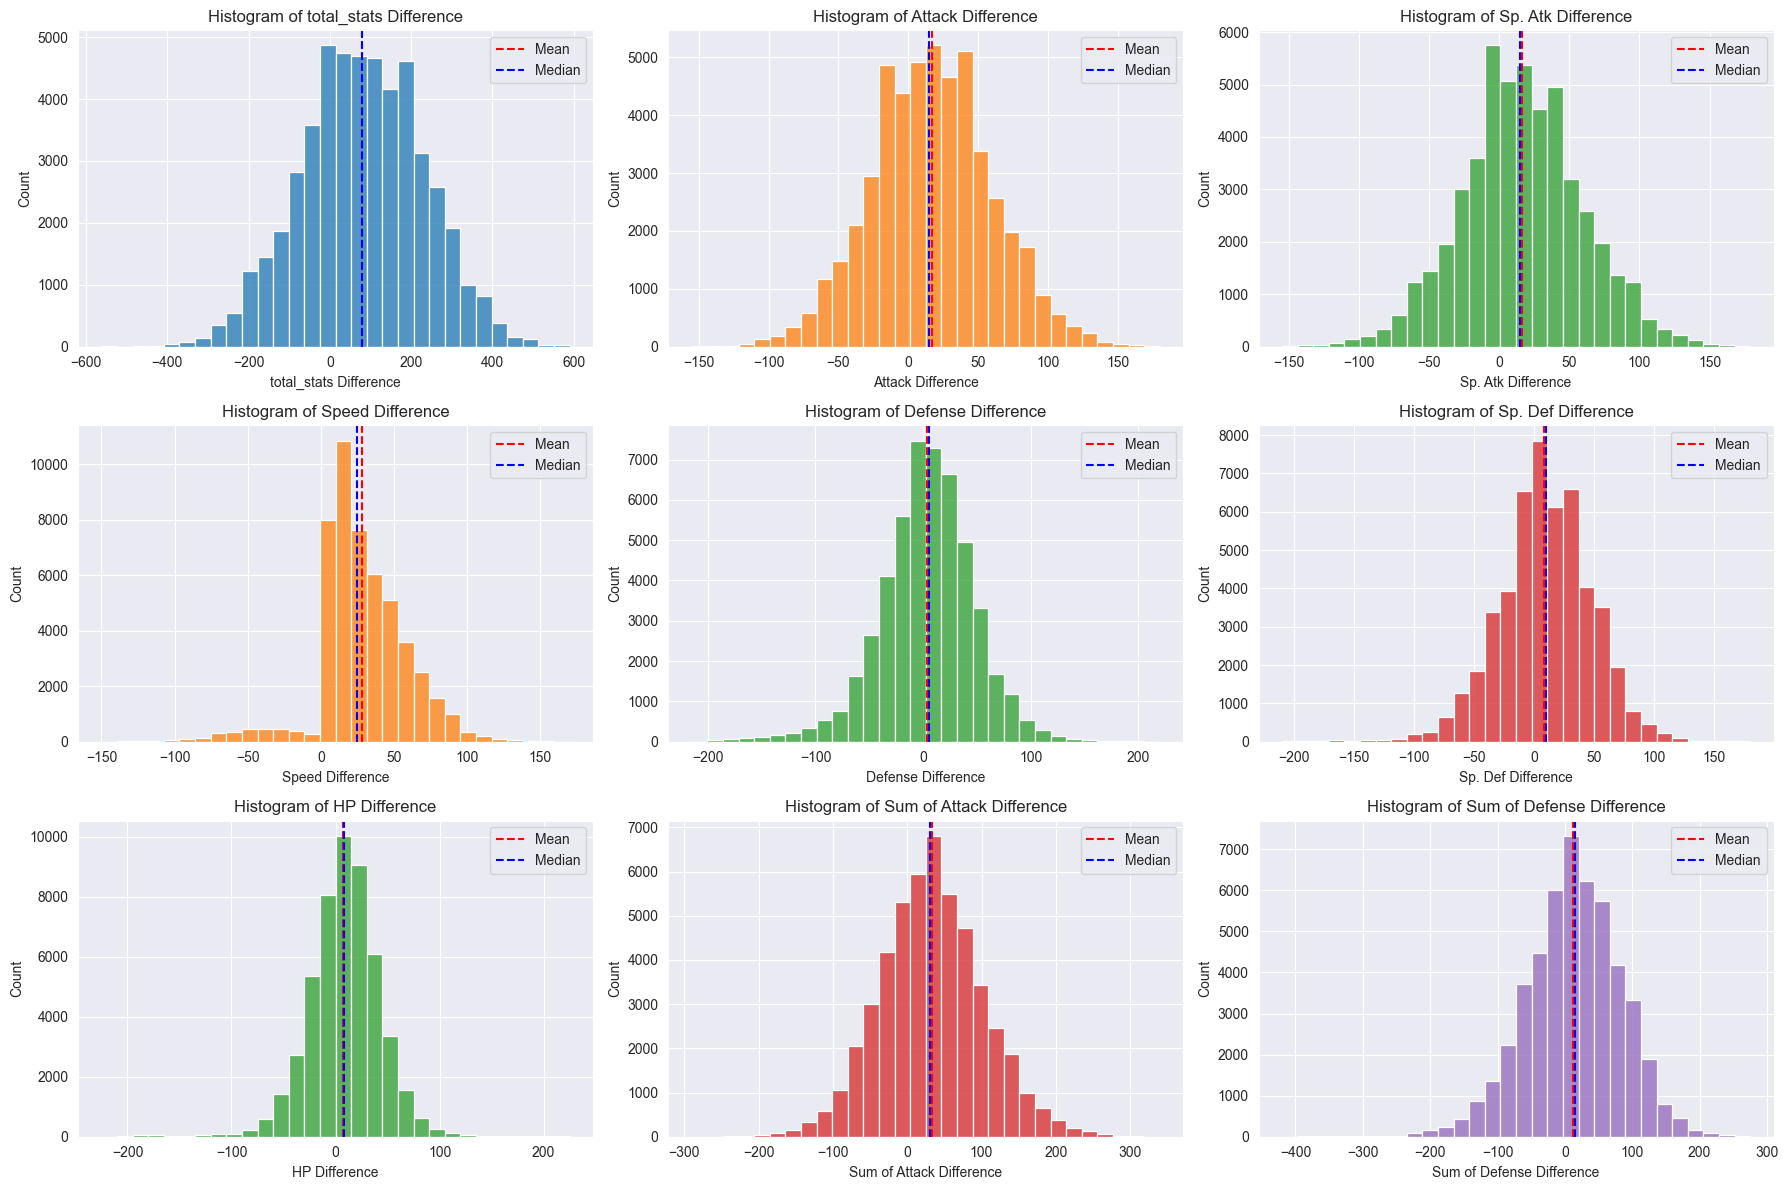

In [105]:
# Histograms of all stats difference with marked mean and median
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for column in columns_to_difference:
    a = (columns_to_difference.index(column)) // 3
    b = (columns_to_difference.index(column)) % 3
    sns.histplot(data=combats_expanded, x=column + '_diff', ax=axes[a, b], bins=30, color=sns.color_palette()[a + b])
    axes[a, b].axvline(diff_means[columns_to_difference.index(column)], color='red', linestyle='--', label='Mean')
    axes[a, b].axvline(diff_medians[columns_to_difference.index(column)], color='blue', linestyle='--', label='Median')
    axes[a, b].set_title(f'Histogram of {column} Difference')
    axes[a, b].set_xlabel(f'{column} Difference')
    axes[a, b].set_ylabel('Count')
    axes[a, b].legend()
plt.tight_layout()
fig.savefig('Histogram vs Difference.png')
plt.show()

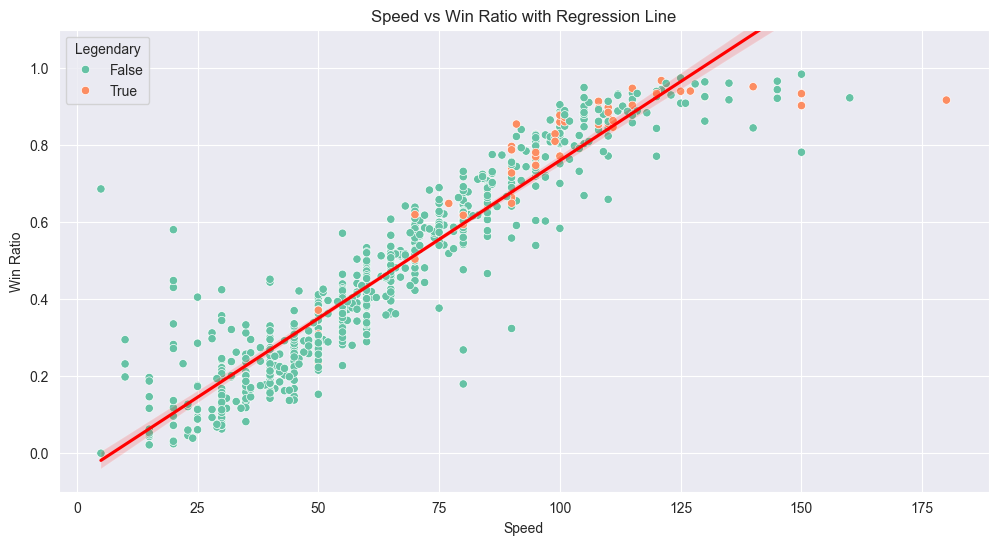

In [70]:
# Scatter plot with regression line to illustrate correlation between speed and win ratio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_clean, x='Speed', y='Win Ratio', hue='Legendary', palette='Set2')
sns.regplot(data=pokemon_clean, x='Speed', y='Win Ratio', line_kws={'color':'red'}, scatter=False)
plt.ylim(-0.1, 1.1)
plt.title('Speed vs Win Ratio with Regression Line')
plt.xlabel('Speed')
plt.ylabel('Win Ratio')
plt.savefig('Speed vs Win Ratio with Regression Line.png')
plt.show()


In [71]:
# Percentage of wins by speed difference
sum_positive_diff = combats_expanded[combats_expanded['Speed_diff'] > 0].shape[0]
faster_wins_ratio = sum_positive_diff / combats_expanded.shape[0]
print(f"Percentage of wins by speed difference: {faster_wins_ratio:.2%}")

Percentage of wins by speed difference: 91.40%


C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\3742394964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_stats_by_type, x='Type 1', y='Speed', palette='Spectral')


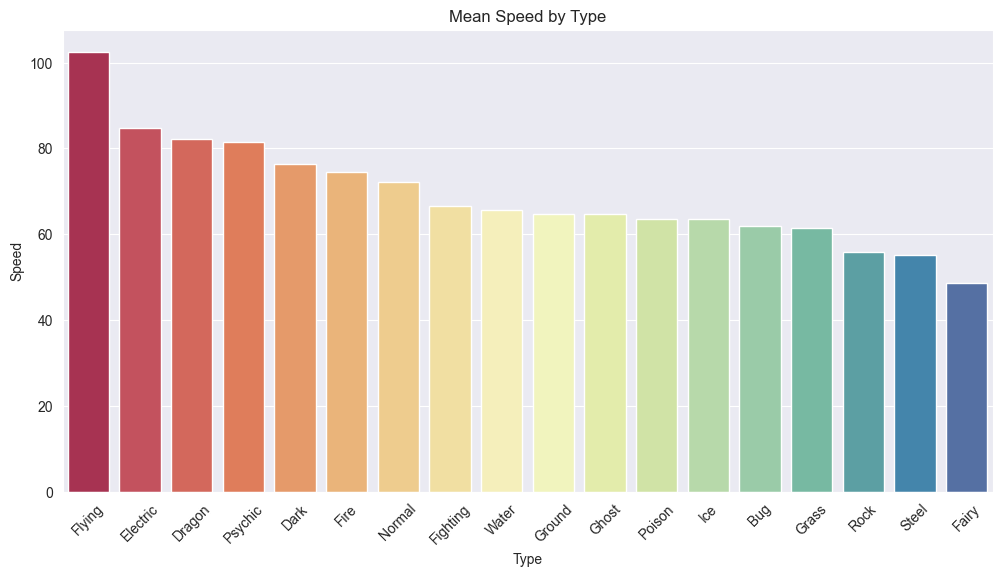

In [72]:
# mean stats for each type
mean_stats_by_type = pokemon_clean.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean().reset_index()
mean_stats_by_type = mean_stats_by_type.sort_values('Speed', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_stats_by_type, x='Type 1', y='Speed', palette='Spectral')
plt.xticks(rotation=45)
plt.title('Mean Speed by Type')
plt.xlabel('Type')
plt.ylabel('Speed')
plt.savefig('Mean Speed vs Type.png')
plt.show()

C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\1633660540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_stats_by_type, x='Type 1', y='Speed', palette='Spectral', ax=axes[0])
C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\1633660540.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].xaxis.get_ticklabels(), rotation=45)
C:\Users\kubas\AppData\Local\Temp\ipykernel_21716\1633660540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio', ax=axes[1], palette='Spectral')
C:\Users\kubas\AppData\Local\Temp\ipyk

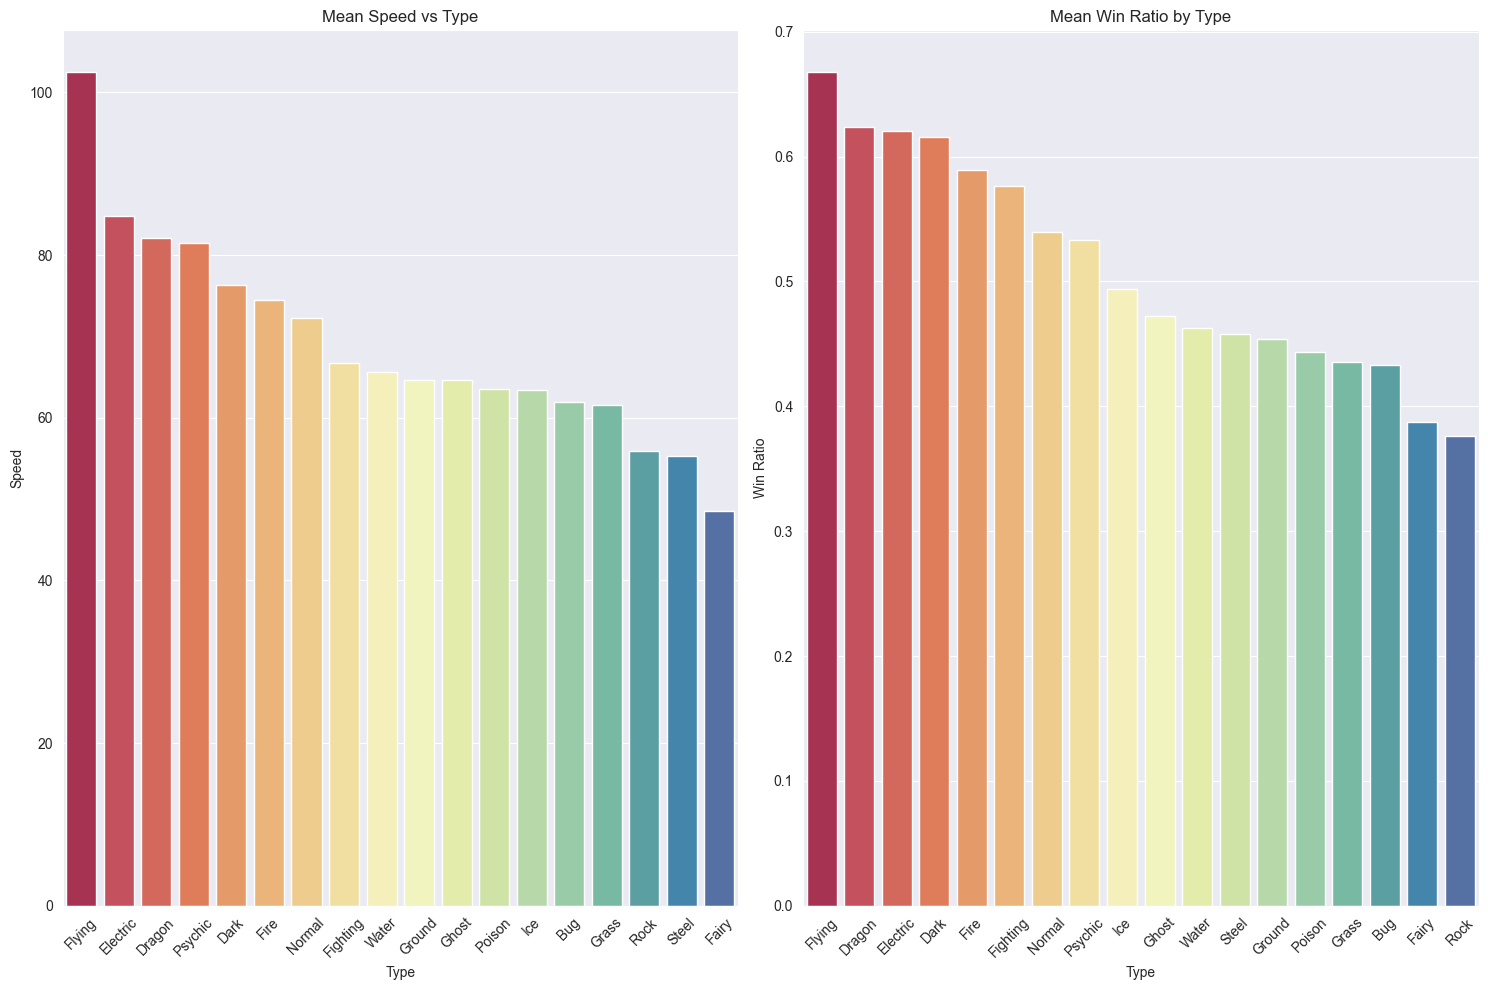

In [73]:
# mean speed for each type and win ratio for each type
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(data=mean_stats_by_type, x='Type 1', y='Speed', palette='Spectral', ax=axes[0])
axes[0].set_title('Mean Speed vs Type')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Speed')
axes[0].set_xticklabels(axes[0].xaxis.get_ticklabels(), rotation=45)
sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio', ax=axes[1], palette='Spectral')
axes[1].set_title('Mean Win Ratio by Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Win Ratio')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()
fig.savefig('Speed and win ratio vs Type.png')
plt.show()

In [74]:
# Create pivot table for type matchup
type_matchup = combats_expanded.pivot_table(index='Type 1 Winner', columns='Type 1 Loser', values='Winner', aggfunc='count', fill_value=0)
type_matchup


Type 1 Loser,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1 Winner,,,,,,,,,,,,,,,,,,
Bug,386,112,97,126,116,116,198,8,162,396,160,144,412,151,274,223,136,555
Dark,197,74,77,94,66,52,127,6,95,240,90,81,271,83,275,181,103,335
Dragon,245,72,75,97,9,83,143,4,105,216,95,80,275,119,148,194,112,418
Electric,347,116,81,134,108,123,196,5,163,306,21,116,418,145,239,204,150,498
Fairy,74,17,75,24,25,21,31,3,28,59,24,24,60,23,37,57,25,100
Fighting,155,51,40,56,41,65,76,0,18,152,61,55,195,75,87,132,70,214
Fire,401,122,109,131,111,140,215,8,157,385,138,134,466,151,215,216,159,544
Flying,30,17,18,11,8,10,21,1,19,27,17,16,44,16,21,16,18,52
Ghost,194,47,48,51,34,113,87,4,83,173,74,62,245,83,130,128,87,234


In [75]:
# Sum the values in the pivot table to get the total number of matches for each type matchup
type_matchup_sum = type_matchup + type_matchup.T

# Calculate the percentage of wins for each type matchup
type_matchup_percent = type_matchup.div(type_matchup_sum, fill_value=0) * 100
type_matchup_percent = type_matchup_percent.round(1)

type_matchup_percent

Type 1 Loser,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1 Winner,,,,,,,,,,,,,,,,,,
Bug,50.0,36.2,28.4,26.6,61.1,42.8,33.1,21.1,45.5,51.8,47.8,48.8,38.6,46.6,42.4,45.8,47.1,46.1
Dark,63.8,50.0,51.7,44.8,79.5,50.5,51.0,26.1,66.9,72.3,60.8,68.1,54.7,66.4,94.5,73.6,67.3,64.4
Dragon,71.6,48.3,50.0,54.5,10.7,67.5,56.7,18.2,68.6,69.0,69.3,69.0,57.4,68.8,53.6,74.6,79.4,71.6
Electric,73.4,55.2,45.5,50.0,81.8,68.7,59.9,31.2,76.2,66.7,9.6,71.2,61.8,72.1,56.6,71.3,71.1,69.8
Fairy,38.9,20.5,89.3,18.2,50.0,33.9,21.8,27.3,45.2,29.1,29.3,40.0,24.3,29.9,26.8,40.7,37.3,31.2
Fighting,57.2,49.5,32.5,31.3,66.1,50.0,35.2,0.0,13.7,56.3,49.2,59.1,44.0,56.4,36.9,68.0,60.3,45.3
Fire,66.9,49.0,43.3,40.1,78.2,64.8,50.0,27.6,64.3,70.4,51.9,68.4,54.1,67.1,48.0,60.3,68.5,58.4
Flying,78.9,73.9,81.8,68.8,72.7,100.0,72.4,50.0,82.6,75.0,89.5,80.0,72.1,80.0,60.0,66.7,85.7,76.5
Ghost,54.5,33.1,31.4,23.8,54.8,86.3,35.7,17.4,50.0,49.3,46.5,50.4,50.6,57.2,45.0,61.5,55.1,46.8


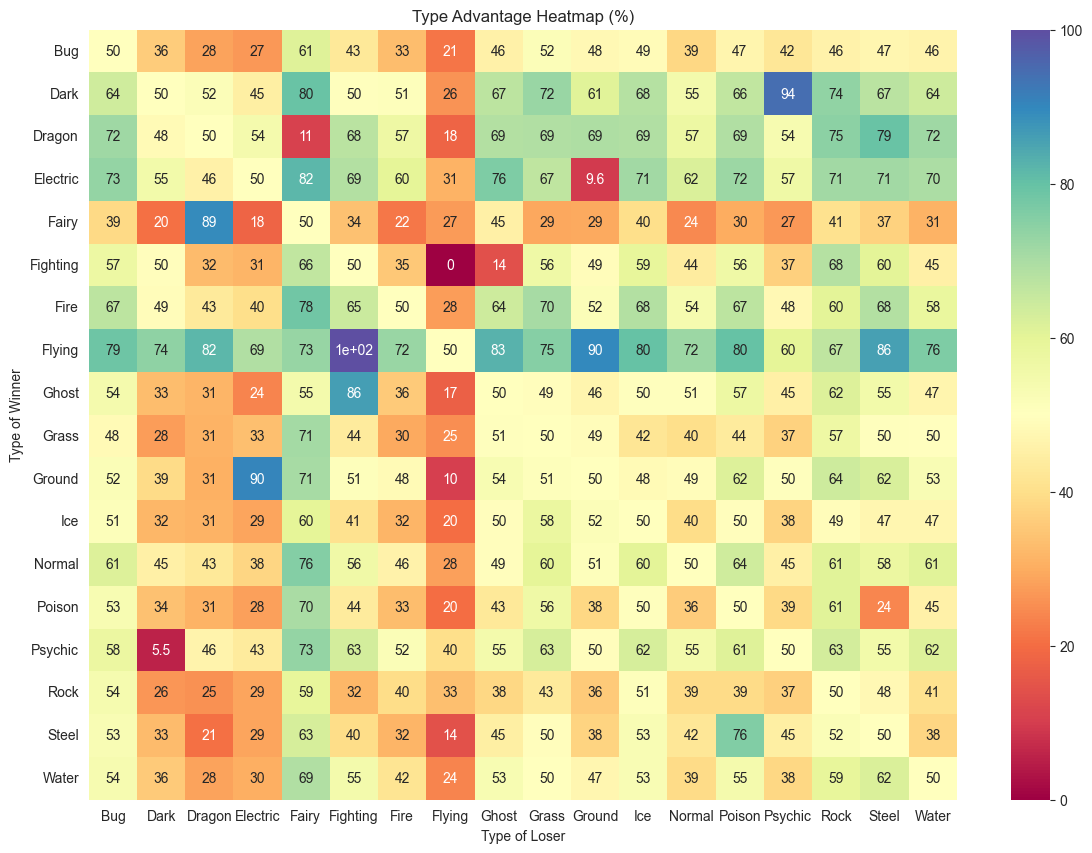

In [76]:

plt.figure(figsize=(14,10))
sns.heatmap(type_matchup_percent, annot=True, cmap='Spectral')
plt.title('Type Advantage Heatmap (%)')
plt.xlabel('Type of Loser')
plt.ylabel('Type of Winner')
plt.savefig('type_advantage_heatmap_4.png', dpi=300, bbox_inches='tight')
plt.show()
